In [15]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
import glob
from scipy import misc
import tensorflow as tf
import numpy as np
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
#Get back the convolutional part of a VGG network trained on ImageNet

In [16]:
import sys
print(sys.executable)
print("---")
sys.path

C:\ProgramData\Anaconda3\python.exe
---


['C:\\Users\\Vamsi\\ML workspace',
 'C:\\ProgramData\\Anaconda3\\python37.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 '',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Vamsi\\.ipython']

In [3]:

model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

In [4]:
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

In [5]:
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())


In [6]:
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())


In [7]:
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

In [8]:
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())


In [10]:
# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())


In [11]:
# Output Layer
model.add(Dense(2))
model.add(Activation('softmax'))

batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = image.ImageDataGenerator()

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = image.ImageDataGenerator()


In [12]:

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
class_names = ['non-crack', 'crack']
train_generator = train_datagen.flow_from_directory(
        "./Images/272 Project/Training",  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 150x150
        batch_size=batch_size,
          class_mode='binary',
       )  # since we use binary_crossentropy loss, we need binary labels

# # this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
          "./Images/272 Project/Test",
          target_size=(224, 224),
          class_mode='binary',
          batch_size=batch_size,
         )

test_generator = test_datagen.flow_from_directory(
          "./Images/272 Project/Validation",
          target_size=(224, 224),
          batch_size=16,
          class_mode='binary',
          shuffle='False')

Found 380 images belonging to 2 classes.
Found 171 images belonging to 2 classes.
Found 309 images belonging to 2 classes.


20

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1
10/10 [==============================] - 313s 31s/step - loss: 1.6991 - acc: 0.5187 - val_loss: 12.5461 - val_acc: 0.2165

Epoch 00001: val_acc improved from -inf to 0.21646, saving model to weights.best.hdf5_2


C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\saving.py:118: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


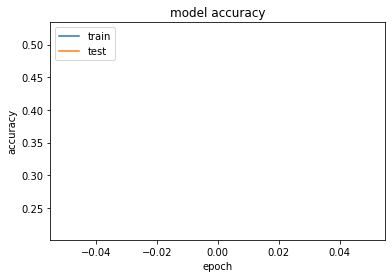

In [13]:
labels=[]
print(len(test_generator))
for i in range(500):
    x,y = test_generator.next()
    for j in range(2):
        labels.append(y[j])

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
filepath="weights.best.hdf5_2"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit_generator(train_generator, epochs=1, steps_per_epoch=10, callbacks=callbacks_list, validation_data=validation_generator, validation_steps=500) #epochs=50, steps=2000
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
model.load_weights("weights.best.hdf5_2")
prediction = model.predict_generator(test_generator, steps=100, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)
prediction_net=[]
for i in range(100):
    if prediction[i][0]>prediction[i][1]:
        prediction_net.append(prediction[i][0])
    else:
        prediction_net.append(prediction[i][1])
count=0
for i in range(100):
    if labels[i]==prediction_net[i]:
        count=count+1


100/100 [==============================] - 64s 635ms/step


In [ ]:
print("Test Accuracy: %f and the count is: %f" %((count/100)*100,count))

In [ ]:
count